### importing library

In [58]:
from sklearn.metrics import r2_score
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Downloading Data

To download the data, we will use !wget to download it from IBM Object Storage.


In [59]:
df = pd.read_csv("Data/Data.csv")

# take a look at the dataset
df.head(11)
#df.describe()

,Date_Time,Max_Temperature,Min_Temperature,Humidity
0,12,38,37,7
1,18,38,28,11
2,0,28,25,26
3,6,35,27,16
4,12,37,35,7
5,18,36,24,20
6,0,25,22,44
7,6,33,24,29
8,12,36,32,15
9,18,35,27,22


### Data Exploration

Let's first have a descriptive exploration on our data.


In [60]:
# summarize the data
df.describe()

,Date_Time,Max_Temperature,Min_Temperature,Humidity
count,30.000000,30.000000,30.000000,30.000000
mean,9.400000,33.500000,28.366667,20.600000
std,6.810742,3.411441,3.943422,9.316652
min,0.000000,25.000000,22.000000,7.000000
25%,6.000000,32.000000,25.250000,14.000000
50%,12.000000,34.500000,27.000000,19.500000
75%,16.500000,36.000000,32.000000,25.000000
max,18.000000,38.000000,37.000000,44.000000


In [61]:
cdf = df[['Max_Temperature' , 'Min_Temperature' , 'Humidity' , 'Date_Time']]
cdf.head(11)

,Max_Temperature,Min_Temperature,Humidity,Date_Time
0,38,37,7,12
1,38,28,11,18
2,28,25,26,0
3,35,27,16,6
4,37,35,7,12
5,36,24,20,18
6,25,22,44,0
7,33,24,29,6
8,36,32,15,12
9,35,27,22,18


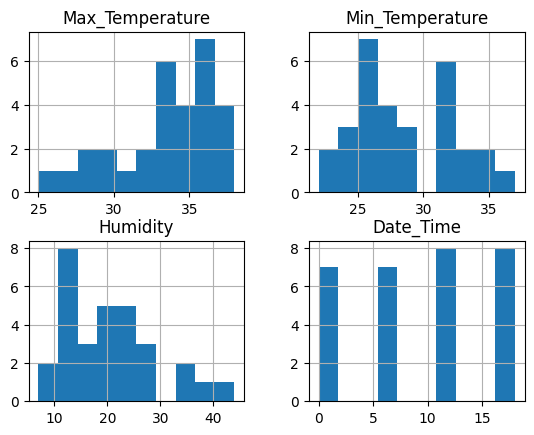

In [62]:
viz = cdf
viz.hist()
plt.show()

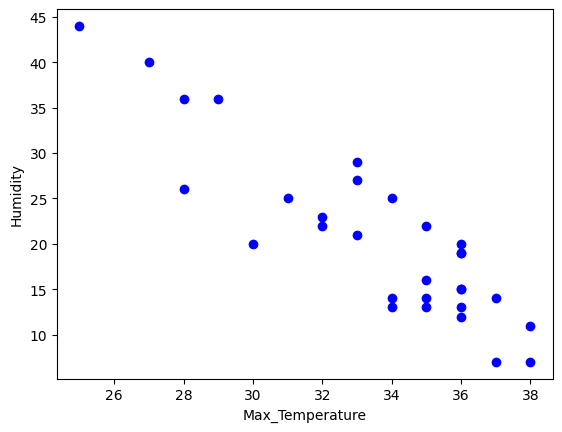

In [63]:
plt.scatter(cdf.Max_Temperature, cdf.Humidity,  color='blue')
plt.xlabel("Max_Temperature")
plt.ylabel("Humidity")
plt.show()

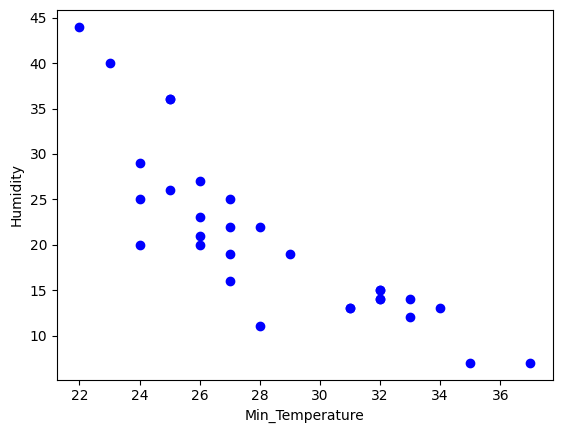

In [64]:
plt.scatter(cdf.Min_Temperature, cdf.Humidity,  color='blue')
plt.xlabel("Min_Temperature")
plt.ylabel("Humidity")
plt.show()

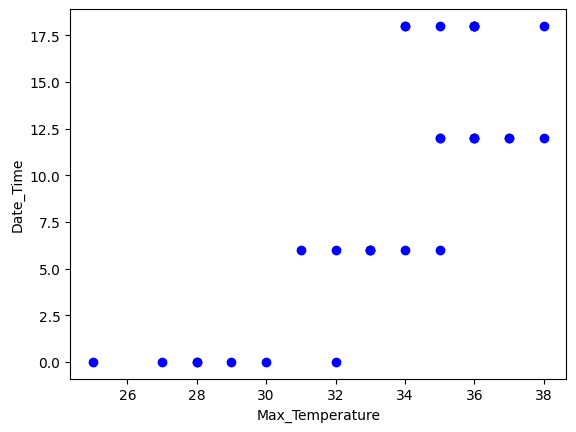

In [65]:
plt.scatter(cdf.Max_Temperature, cdf.Date_Time,  color='blue')
plt.xlabel("Max_Temperature")
plt.ylabel("Date_Time")
plt.show()

In [70]:
msk = np.random.rand(len(df)) < 0.5
train = cdf[msk]
test = cdf[~msk]

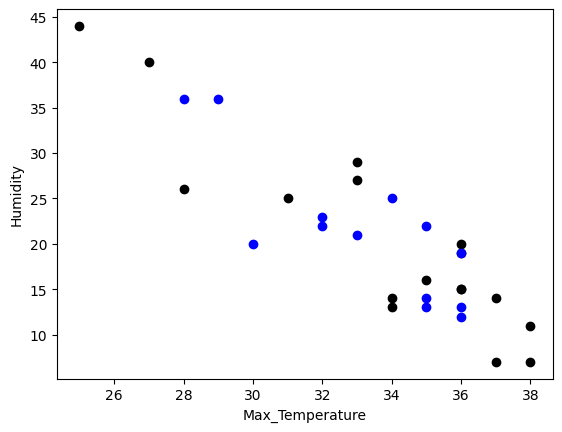

In [71]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(train.Max_Temperature, train.Humidity,  color='black')
ax1.scatter(test.Max_Temperature, test.Humidity,  color='blue')
plt.xlabel("Max_Temperature")
plt.ylabel("Humidity")
plt.show()

In [72]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Max_Temperature']])
train_y = np.asanyarray(train[['Humidity']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
print ("score   : %.2f" % regr.score(train_x, train_y))

Coefficients:  [[-2.44191675]]
Intercept:  [102.56824782]
score   : 0.82


Text(0, 0.5, 'Humidity')

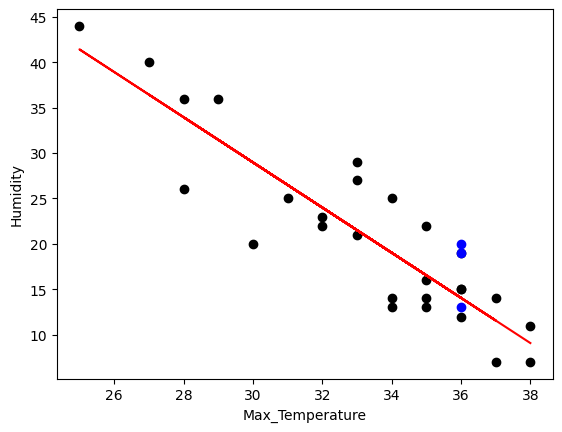

In [69]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(train.Max_Temperature, train.Humidity,  color='black')
ax1.scatter(test.Max_Temperature, test.Humidity,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Max_Temperature")
plt.ylabel("Humidity")

In [83]:
cdf = df[['Min_Temperature','Max_Temperature','Humidity']]
cdf.head(9)

,Min_Temperature,Max_Temperature,Humidity
0,37,38,7
1,28,38,11
2,25,28,26
3,27,35,16
4,35,37,7
5,24,36,20
6,22,25,44
7,24,33,29
8,32,36,15


In [92]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['Date_Time']])
train_y = np.asanyarray(train[['Max_Temperature']])

test_x = np.asanyarray(test[['Date_Time']])
test_y = np.asanyarray(test[['Max_Temperature']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[  1.,  12., 144.],
       [  1.,  18., 324.],
       [  1.,   0.,   0.],
       [  1.,   6.,  36.],
       [  1.,  12., 144.],
       [  1.,  18., 324.],
       [  1.,   0.,   0.],
       [  1.,   6.,  36.],
       [  1.,  12., 144.],
       [  1.,   6.,  36.],
       [  1.,  12., 144.],
       [  1.,  18., 324.],
       [  1.,  18., 324.],
       [  1.,   0.,   0.],
       [  1.,   6.,  36.],
       [  1.,  18., 324.],
       [  1.,  18., 324.]])

In [93]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)


Coefficients:  [[ 0.          1.4875     -0.05393519]]
Intercept:  [26.46666667]


Text(0, 0.5, 'Max_Temperature')

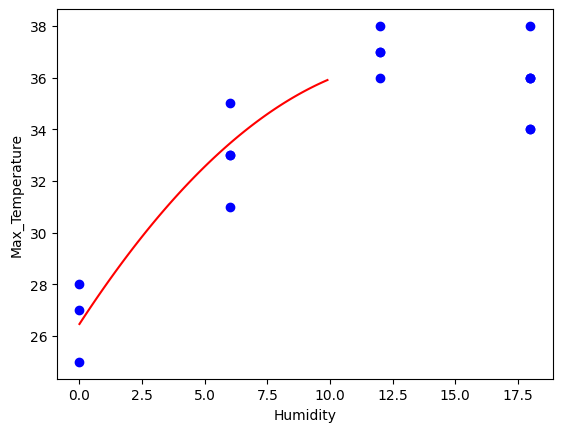

In [95]:
plt.scatter(train.Date_Time, train.Max_Temperature,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Humidity")
plt.ylabel("Max_Temperature")

In [96]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 1.60
Residual sum of squares (MSE): 4.66
R2-score: 0.34


In [98]:
train_x = np.asanyarray(train[['Date_Time']])
train_y = np.asanyarray(train[['Max_Temperature']])

test_x = np.asanyarray(test[['Date_Time']])
test_y = np.asanyarray(test[['Max_Temperature']])
print (train_x[:3])
poly = PolynomialFeatures(degree=6)
train_x_poly = poly.fit_transform(train_x)
train_x_poly


[[12]
 [18]
 [ 0]]


array([[1.0000000e+00, 1.2000000e+01, 1.4400000e+02, 1.7280000e+03,
        2.0736000e+04, 2.4883200e+05, 2.9859840e+06],
       [1.0000000e+00, 1.8000000e+01, 3.2400000e+02, 5.8320000e+03,
        1.0497600e+05, 1.8895680e+06, 3.4012224e+07],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 6.0000000e+00, 3.6000000e+01, 2.1600000e+02,
        1.2960000e+03, 7.7760000e+03, 4.6656000e+04],
       [1.0000000e+00, 1.2000000e+01, 1.4400000e+02, 1.7280000e+03,
        2.0736000e+04, 2.4883200e+05, 2.9859840e+06],
       [1.0000000e+00, 1.8000000e+01, 3.2400000e+02, 5.8320000e+03,
        1.0497600e+05, 1.8895680e+06, 3.4012224e+07],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 6.0000000e+00, 3.6000000e+01, 2.1600000e+02,
        1.2960000e+03, 7.7760000e+03, 4.6656000e+04],
       [1.0000000e+00, 1

In [99]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)


Coefficients:  [[ 0.00000000e+00  1.51161344e-04  8.03268929e-04  3.72907367e-03
   1.20572575e-02 -1.61537118e-03  5.21465486e-05]]
Intercept:  [26.66666667]


Text(0, 0.5, 'Max_Temperature')

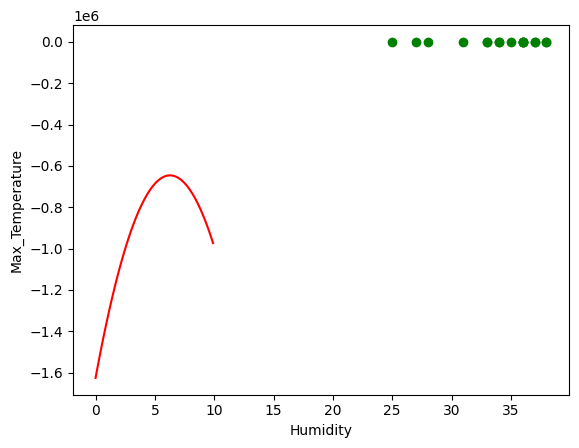

In [90]:
plt.scatter(train.Max_Temperature, train.Humidity,  color='green')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Humidity")
plt.ylabel("Max_Temperature")

In [100]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %F" % r2_score(test_y,test_y_ ) )

Mean absolute error: 1.64
Residual sum of squares (MSE): 4.56
R2-score: 0.352908
